In [12]:
import pymongo
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

In [3]:
conn_str="mongodb://localhost:27017"
client=pymongo.MongoClient(conn_str,serverSelectionTimeoutMS=500)

try:
    print(client.server.info())
except Exception:
    print("No conectado")

No conectado


In [4]:
db=client["Actividad"]
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, serverselectiontimeoutms=500), 'Actividad')

In [23]:
clics=db["Clics"]
pprint(clics.find())

In [6]:
tweets=db["Tweets"]
pprint(tweets.find())

In [35]:
#CLICS
#Seleccionar las columnas “_id”, “a”, y “cy” de clics
pd.DataFrame(clics.find({},{"a":1, "cy":1}).sort("cy", pymongo.DESCENDING).skip(1))

,_id,a,cy
0,6380fc2a616b4ab4d59e90cd,Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...,Zoetermeer
1,6380fc2a616b4ab4d59e8c29,GoogleProducer; (+http://goo.gl/7y4SX),Zaventem
2,6380fc2a616b4ab4d59e917e,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,Zarinsk
3,6380fc2a616b4ab4d59e9399,Mozilla/5.0 (Linux; U; Android 4.1.2; es-es; G...,Zaragoza
4,6380fc2a616b4ab4d59e8a31,Mozilla/5.0 (Windows NT 5.1; rv:20.0) Gecko/20...,Zagreb
...,...,...,...
3063,6380fc2a616b4ab4d59e943d,Mozilla/5.0 (iPhone; CPU iPhone OS 6_1_3 like ...,NaN
3064,6380fc2a616b4ab4d59e943f,Opera/9.80 (Series 60; Opera Mini/7.1.32444/29...,NaN
3065,6380fc2a616b4ab4d59e9448,Mozilla/5.0 (MeeGo; NokiaN9) AppleWebKit/534.1...,NaN
3066,6380fc2a616b4ab4d59e944c,Opera/9.80 (Windows NT 6.1; WOW64) Presto/2.12...,NaN


In [37]:
#Crear una serie con todos los valores únicos de “a”
pd.DataFrame(clics.distinct("a"))

,0
0,0 Opera/9.80 (J2ME/MIDP; Opera Mini/6.5.27891/...
1,BlackBerry8520/5.0.0.1075 Profile/MIDP-2.1 Con...
2,BlackBerry8520/5.0.0.592 Profile/MIDP-2.1 Conf...
3,BlackBerry8520/5.0.0.592 Profile/MIDP-2.1 Conf...
4,BlackBerry8900/5.0.0.1036 Profile/MIDP-2.1 Con...
...,...
554,Xenu Link Sleuth/1.3.8
555,Yes Streamer 1.5.7.2 Indexer (powered by TVers...
556,findlinks/2.6 (+http://wortschatz.uni-leipzig....
557,iCoreService (unknown version) CFNetwork/520.5...


In [26]:
#Contar los usuarios de Opera y Mozilla utilizando el campo "a"
pd.DataFrame(clics.aggregate([
    {
        "$match":{
            "$or":[{"a":{"$regex":"Opera"}},{"a":{"$regex":"Mozilla"}}]
        }
    },
    {"$count":"a"}
]))

,a
0,2830


In [31]:
#Encontrar cuantos usuarios hablan inglés
df_en = pd.DataFrame(clics.find({"al":{"$regex":"en"}},{"_id":0}))
df_en.shape[0]

1278

In [32]:
#Encontrar cuántos usuarios son de Seoul.
df_Se = pd.DataFrame(clics.find({"cy":{"$regex":"Seoul"}},{"_id":0}))
df_Se.shape[0]

6

In [9]:
#TWEETS
#¿Cuántas filas contiene la collección?
df_t = pd.DataFrame(tweets.find())
df_t.shape[0]

122

In [89]:
#Enumerar los screen_names de los usuarios que han tuiteado más de una vez
pd.DataFrame(tweets.aggregate(
    [ 
        { "$group":  { "_id": "$user.screen_name", "conteo": { "$sum": 1 } } },
        {"$match": {"conteo": {"$gt": 1}}} 
    ]
))

,_id,conteo
0,SoyLatte,2
1,arianaskittles,2


In [52]:
#¿Cuántos tweets son sobre Starbucks?
df = pd.DataFrame(tweets.find({"text":{"$regex":"Starbucks"}},{"_id":0}))
df.shape[0]

10

In [56]:
df_t["retweeted_status"].notnull().count()

122

In [58]:
#Enumerar los tweets en español
df = pd.DataFrame(tweets.find({"lang":{"$regex":"es"}},{"_id":0}))
df.shape[0]

17

<AxesSubplot:>

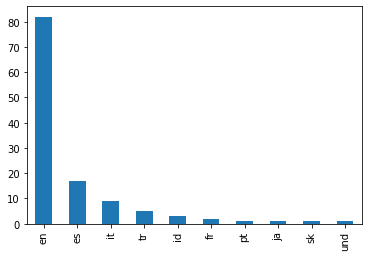

In [13]:
#Elaborar un gráfico de barra con el lenguaje del tweet en el eje X, 
#y la cantidad de tweets en el eje Y
df_t['lang'].value_counts().plot(kind='bar')